In [51]:
# Сортирую по заказам и считаю сумму по пользователям

olist_orders_delivered = olist_orders[olist_orders['order_status'] == 'delivered']
y = olist_rfm.groupby('customer_unique_id')['price'].sum().reset_index(name='sum_price')
y.head()

,customer_unique_id,sum_price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


In [52]:
# Разбиваю на 3 группы по сумме: 3) от 154, 2) от 89.73, 1) остальные

y['m_score'] = pd.cut(y['sum_price'], bins=[-np.inf, 89.73, 154, np.inf], labels=[1, 2, 3])
y.head()

,customer_unique_id,sum_price,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1
2,0000f46a3911fa3c0805444483337064,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,3


In [53]:
# Соединяю M-score с таблицей

orders_status_rfm = orders_status_rfm.merge(y, how='left', on='customer_unique_id')

In [54]:
orders_status_rfm = orders_status_rfm[['customer_unique_id','r_score','f_score','m_score']]
orders_status_rfm.head()

,customer_unique_id,r_score,f_score,m_score
0,861eff4711a542e4b93843c6dd7febb0,1,1,2
1,290c77bc529b7ac935b93aa66c333dc3,1,1,3
2,060e732b5b29e8181a18229c7b0b2b5e,1,1,2
3,259dac757896d24d7702b9acbbff3f3c,1,1,2
4,345ecd01c38d18a9036ed96c73b8d066,3,1,3


In [55]:
# Добавляю RFM

orders_status_rfm['RFM'] = orders_status_rfm[['r_score', 'f_score', 'm_score']].apply(lambda x: ''.join(x.astype(str)), axis=1)
orders_status_rfm.head()

,customer_unique_id,r_score,f_score,m_score,RFM
0,861eff4711a542e4b93843c6dd7febb0,1,1,2,112
1,290c77bc529b7ac935b93aa66c333dc3,1,1,3,113
2,060e732b5b29e8181a18229c7b0b2b5e,1,1,2,112
3,259dac757896d24d7702b9acbbff3f3c,1,1,2,112
4,345ecd01c38d18a9036ed96c73b8d066,3,1,3,313


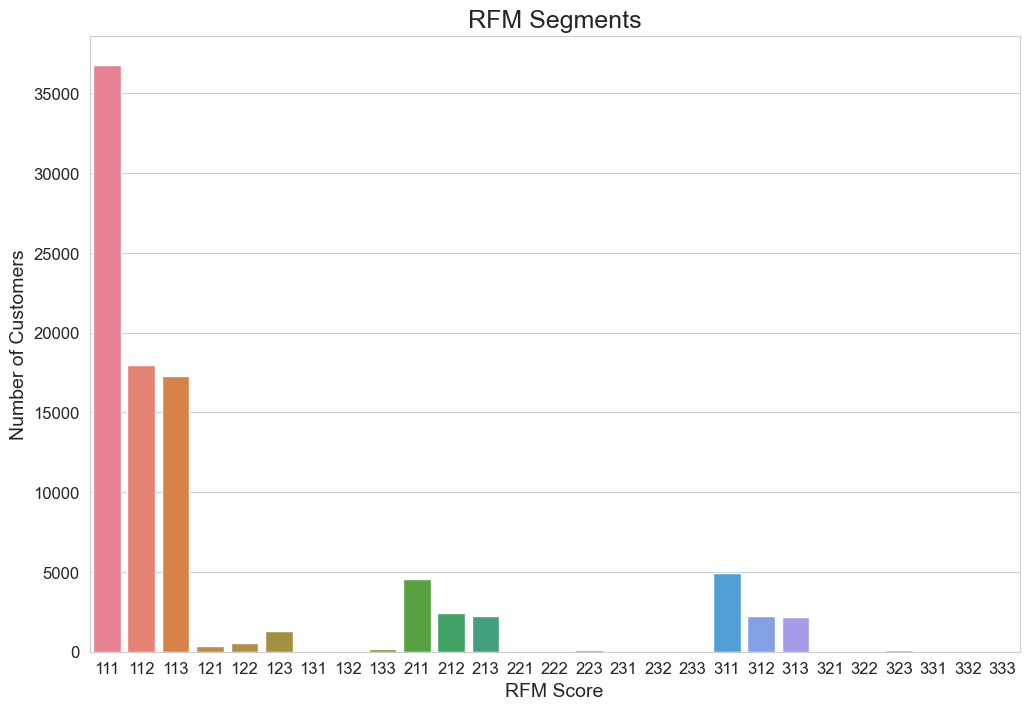

In [56]:
# Данные для графика
result = orders_status_rfm.groupby('RFM',as_index=False) \
    .agg({'customer_unique_id':'count'})

# Создаю график
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=result, x='RFM', y='customer_unique_id', palette="husl")

# Добавляю подписи осей и заголовок графика
plt.xlabel('RFM Score', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.title('RFM Segments', fontsize=18)

# Устанавливаю размер шрифта на осях
plt.tick_params(labelsize=12)
plt.show()